In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Homework 1
## INFO 4871 / 5871
## _Juan Vargas-Murillo_

The purpose of this assignment is gain experience working with user profile data as commonly found in recommender systems. 

### Hints

The following functions of the Pandas API are worth refreshing your memory on:

- `read_csv`
- `DataFrame.groupby`
- `DataFrame.query`
- `DataFrame.join`
- `DataFrame.crosstab`

Also, the sections of the Pandas documentation on "Indexing and Selecting Data" and "Group By: split-apply-combine".

### More hints
The third-ranked item produced by each recommender should be:

- `PopFreq`: _Forrest Gump_
- `PopFreq` (Filtered): _Lord of the Rings: Fellowship of the Ring_
- `PopRating`: _Touch of Evil_
- `PopRating` (Filtered): _Fight Club_

## Step 1
Load the MovieLens data. There are three files: ratings.csv, movies.csv, tags.csv. Note: the files use "Latin 1" encoding. You'll need to include this information in the call to `read_csv`. Use the `head()` function to show the contents of each data frame after you read it. Hint: Your life will be easier later if you use `movies.set_index('movieId')` to set the index of the `movies` data frame to be the movie id. 

In [263]:
movies = pd.read_csv("movies.csv", encoding="Latin 1")
# movies = movies.set_index("movieId")
# m = movies.query('movieId == 340')
# movies.loc[340]

In [264]:
ratings, tags = pd.read_csv("ratings.csv", encoding="Latin 1"), pd.read_csv("tags.csv", encoding="Latin 1")

## Step 2

- Compute a rating count data frame: for each movie, how many times has it been rated? (Value of the rating doesn't count)
- Compute the minimum value. Identify the name of a movie that has this minimum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Compute the maximum value. Identify the name of a movie that has the maximum count? INFO 5871: (optional for INFO 4871: No hard-coded values.)
- Plot the rating count distribution as a histogram.


### Create the rating count data frame

In [305]:
rating_count = ratings.groupby("movieId").agg({'rating': 'count'})
rating_count.rename(columns={'rating':'count'}, inplace=True)
rating_count

,count
movieId,
1,496
2,279
3,78
4,13
5,76
6,198
7,82
9,26
10,253


### Minimum rated movie
Hard-coded method

In [317]:
idxmin = rating_count.idxmin()[0]
mincnt = rating_count.min()[0]

In [318]:
idxmin

340

In [319]:
mincnt

3

In [328]:
print(f"The movie rated {mincnt} times is {movies.set_index('movieId').loc[340]['title']}")

The movie rated 3 times is War, The (1994)


Non-hard-coded method

In [ ]:
min_rate = rating_count['rating'].min()
min_mov = rating_count[rating_count['rating'] == min_rate].index[0]
min_title = movies.loc[min_mov]['title']
print(f"The movie rated {min_rate} times is {min_title}")

Alternative using inner join

In [265]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [269]:
res = pd.merge(ratings,
              movies[['title', 'movieId']],
              on='movieId',
              how='inner')

In [280]:
# res.groupby('title').agg({'movieId':'count'}).max()
# res.groupby('title').agg({'movieId':'count'}).min()[0]

### Most-rated movie
Hard-coded method

In [131]:
max_rate = rating_count['rating'].max()
max_mov = rating_count[rating_count['rating'] == max_rate].index[0]
max_title = movies.loc[max_mov]['title']

In [132]:
print(f"The movie rated {max_rate} times is {max_title}")

The movie rated 668 times is Matrix, The (1999)


The movie rated 668 times is Matrix, The (1999)


Non-hard-coded method (join)

Histogram. (Use bins of size 50.)

## Step 3

- Compute the rating value distribution: for each possible rating value (0.5, 1,1.5,2.0,2.5, ..., 4.5, 5.0), how many movies have that rating?
- Plot the rating value distribution as a line plot

Text(0.5,0,'rating')

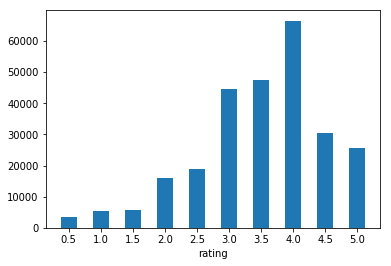

In [279]:
from collections import Counter

rvd = Counter(ratings['rating'].values)
k = list(rvd.keys())
v = rvd.values()
plt.bar(k, v, width=.25)
plt.xticks(k)
plt.xlabel('rating')

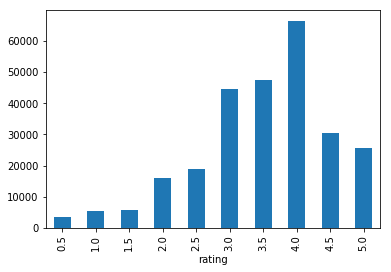

### _Question:_ What does this distribution tell you about the kind of preferences represented in the MovieLens data set?

A lot of people tend to submit ratings for movies that fall within the range of 3-4.

## Step 4

- Compute the profile length distribution: for each user, how many ratings have they contributed?
- Compute the minimum value. Identify the id of the user that has this minimum count?
- Compute the maximum value. Identify the id of the user that has the maximum count?
- Plot the profile length distribution as a histogram.


### Create the profile length data frame

In [242]:
profile_length_dist = Counter(ratings['userId'].values)
profile_length_dist

Counter({316: 129,
         320: 62,
         359: 833,
         370: 411,
         910: 677,
         975: 242,
         1015: 282,
         1387: 194,
         1447: 22,
         1588: 566,
         1738: 86,
         1741: 641,
         1835: 193,
         1935: 256,
         2024: 477,
         2248: 215,
         2702: 361,
         2847: 142,
         2945: 737,
         2988: 611,
         3029: 338,
         3076: 287,
         3569: 76,
         3665: 191,
         3915: 225,
         4215: 357,
         4347: 1033,
         4483: 393,
         4629: 418,
         4931: 301,
         5063: 611,
         5268: 21,
         5450: 378,
         5475: 623,
         5611: 159,
         6116: 181,
         6937: 92,
         6988: 469,
         7541: 56,
         7723: 504,
         7880: 417,
         8335: 17,
         8527: 62,
         8932: 820,
         9050: 296,
         9197: 796,
         9263: 181,
         9745: 138,
         9991: 46,
         10055: 716,
         10164

Hard-coded

In [243]:
minUID = min(profile_length_dist, key=profile_length_dist.get)

In [244]:
profile_length_dist[minUID]

14

In [245]:
maxUID = max(profile_length_dist, key=profile_length_dist.get)

In [246]:
profile_length_dist[maxUID]

1900

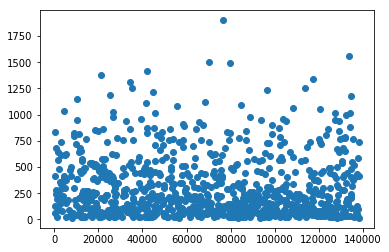

In [252]:
kpld = list(profile_length_dist.keys())
# k
vpld = profile_length_dist.values()
plt.scatter(kpld, vpld)
plt.show()

Non-hard-coded

## Step 5
Build a non-personalized popularity-based top 20 recommender. Ignore the value of the rating and just count how many times a movie appears in someone's ratings. We will call this `PopFreq`.

Can re-use some of the results from above. Sort in descending order

In [334]:
ratings.groupby(['userId', 'movieId']).agg({'movieId':'count'}).tail()

movieId
userId movieId         
138200 69844          1
       72011          1
       72998          1
       74458          1
       74789          1

Join against the movie table to see what movies these are.

## Step 5.5 (INFO 5871 only)
Build a filtered version of `PopFreq` in which ratings below 4 are filtered out. Hint: the `DataFrame.query` function is handy for this.

### _Question:_ What movie no longer appears in the top 10 after filtering by rating value? What must be true of this movie for this to be the case?

_Answer_: (max 50 words) 

## Step 6
Build non-peraonalized recommender that orders the movies by average rating. We will call this version `PopRating`.

### _Question:_ This list is quite different from the `PopFreq` list. What must be true of "The Godfather" for it to appear on this list, but not the other one?

_Answer:_ (max 50 words) 

## Step 6.5 (INFO 5871 only)
Build a version of `PopRating` that drops movies that have been rated less than 100 times

- Do frequency table
- Filter out the movies with fewer than 100 ratings
- Join with `means`
- Sort this

### _Question:_ Compare this list with `PopRating` and identify a movie that no longer appears in the top 10? What movie is it? What must be true of this movie for this to be the case?

_Answer_: (max 50 words)